<a href="https://colab.research.google.com/github/CDLS12/IA_Machine_Learning/blob/main/Machine_Learning_no_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

Alumno: Carlos David Lozano Sanguino

Matricula: A01275316

Salary Prediction Data: Para este portafolio se implementara la tecnica machine learning linear regression de manera manual para la prediccion de los salarios de una persona teniendo en cuenta la cantidad de años que ha trabajado por lo tanto este dataset se dividira entre dos columnas que sera Años de Experiencia y la columna o datos a predecir denominada como Salario.

Se utilizara solo y exclusivamente la libreria pandas para demostar los datos como parte del entregable y la implementacion del algoritmo sera sin framework

In [202]:
import pandas as pd
import numpy as np
Salary = pd.read_csv("Salary_Data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Para empezar tomaremos los valores de cada columna para pasarlos a una lista y definir los valores inciales de los hiper-parametros:

In [231]:
# Crear lista con los valores de la variable independiente (YearsExperience)
Experience_Time = [ 1.1,  1.3,  1.5,  2,  2.2,  2.9,  3,  3.2,  3.2,  3.7,  3.9,
4,  4,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1, 7.9,  8.2,  8.7,  9,  9.5,  9.6, 10.3, 10.5]
# Crear lista con los valores de la variable dependiente (Salary)
Salary = [ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872]

FUNCION HIPOTESIS

El siguiente paso sera definir la funcion hipotesis que nos dara el salario dependiendo del valor que le demos de años de experiencia, mas adelante se buscara una mejor funcion hipotesis para mejorar la prediccion y sea asi mas exacta a la original

In [232]:
# Se usa función lambda para la función de hipótesis
h = lambda x: theta0 + theta1*x
print(len(Experience_Time))
print(len(Salary))

30
30


FUNCION DE COSTO

Teniendo definida nuestra funcion hipotesis el siguiente paso es definir nuesta funcion de costo que nos ayudara a medir o calificar la prediccion de nuesta funcion de hipotesis y mejorarlo cada vez mas aplicando Mean Squared Error minimizando el error de la funcion con la siguiente formula.


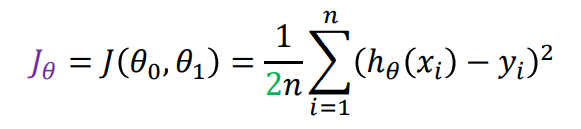

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

En la siguiente parte del codigo se implementara la funcion de costo con las derivadas de theta0 y  theta1

In [240]:
def linear_regression(X, y, learning_rate, iterations):
    n = len(y)  # Número de ejemplos
    theta0 = 0
    theta1 = 0

    for _ in range(iterations):
        dtheta0 = 0
        dtheta1 = 0

        for i in range(n):
            prediction = theta0 + theta1 * X[i]  # Predicción del modelo(Funcion Hipotesis)
            error = prediction - y[i]  # Error de predicción(Derivada de Theta0)
            dtheta0 += error
            dtheta1 += error * X[i] # Error de predicción(Derivada de Theta1)

        dtheta0 /= n  #Tras haber hecho la sumatoria se divide entre el numero total de ejemplos
        dtheta1 /= n

        theta0 -= learning_rate * dtheta0  #Se aplica el algoritmos gradiente descendiente
        theta1 -= learning_rate * dtheta1

    return theta0, theta1
# Hiperparámetros
learning_rate = 0.001


# Aplicar regresión lineal
theta0, theta1 = linear_regression(Experience_Time, Salary , learning_rate, 100000)

# Mostrar los resultados
print("Theta0:", theta0)
print("Theta1:", theta1)


Theta0: 25792.20018316535
Theta1: 9449.962323755708


En el anterior codigo se implemento una funcion que entrenara a la funcion hipotesis para mejorar y cambiar los valores de theta en cada iteracion
que en este caso se definio un total de 100000 para entrenar al modelo suficientemente bien y asi saque valores muy aproximados a los reales
el paso siguiente a eso fue aplicar las derivadas con un for que simulara la sumatoria para finalmente dividir todo entre la cantidad de ejemplos que tiene
el dataset y actualizar las thetas con el gradiente descendente multiplicando los valores que se sacaron de los deltas por el learning rate que se definio como 0.001 y restarlo al valor actual de theta hasta sacar la mejor aproximacion de la funcion hipotesis.

Tras haber entrenado el modelo la n cantidad de iteraciones aplicamos la funcion hipotesis y tomamos varios valores para probar si el modelo es preciso:

In [253]:
#Datos Reales = [2,37731]
h(2)

44692.12483067677

In [254]:
#Datos Reales = [6.8,91738]
h(6.8)

90051.94398470416

In [256]:
#Datos Reales = [9,105582]
h(9)

110841.86109696672

In [257]:
#Datos Reales = [10.3,122391]
h(10.3)

123126.81211784914

Podemos comprobar que el modelo aunque bien no es exacto se aproxima lo suficiente al valor original dado que en el dataset original los salarios no siguen una tendencia continua o lineal por lo tanto no se saca 100% exacto pero podemos concluir que el modelo es exacto y el error varia solo 1000 de valor o dinero en cuanto al salario.

# **Visualizacion de los datos**

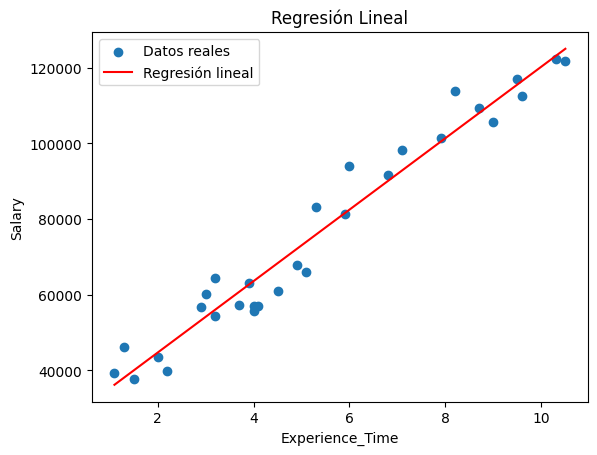

In [250]:
import matplotlib.pyplot as plt
plt.scatter(Experience_Time, Salary, label='Datos reales')
plt.plot(Experience_Time, [theta0 + theta1 * x for x in Experience_Time], color='red', label='Regresión lineal')
plt.xlabel('Experience_Time')
plt.ylabel('Salary')
plt.legend()
plt.title('Regresión Lineal')
plt.show()

Esta visualizacion de los datos nos ayuda a ver como se aproxima la regresion lineal a los valores reales y podemos ver que el modelo sigue el flujo o comportamiento de los datos tocando y aproximandose a los reales existen algunos lejos de la regresion lineal siendo mas outliers pero el resto tienen un minimo error.